# Trabalho 7 - Fusão de imagens de satélite com a banda pancromática

## Preâmbulo

Segmentação é um processo que se refere a dividir a imagem digital em regições, agrupamento de pixels, ou objetos, para simplificar ou mudar a representação da imagem de forma tornar a sua análise mais simples.

Pode-se destacar alguns tipos de segmentação, a saber:

* Baseadas em formatos
  * Detecção de pontos
  * Detecção de descontinuidades
  * Detecção de bordas
  * Detecção de linhas
* Baseada em características dos pixels
  * Segmentação de cores
  * Segimentação de intensidades
* Utilizando movimento
* Baseada em histograma

Técnicas de segmentação também podem ser usadas para adicionar meta-informações aos pixels, como formato e tamanho da região, de forma a facilitar a análise dos pixels individualmente.

![Fusão banda cromática](FusaoLandsat8.png)


## Código

O código, apresentado a seguir, é separado nos métodos:
* image_side_by_side - plota duas imagens lado a lado;
* get_channel - obtem um dos canais de cor da imagem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from sklearn.metrics import mean_squared_error


def image_side_by_side(imgs, titles):
    imgs = [np.round(img).astype("uint8") for img in imgs]
    plt.subplot(121), plt.imshow(imgs[0], cmap='gray'), plt.title(titles[0])
    plt.subplot(122), plt.imshow(imgs[1], cmap='gray'), plt.title(titles[1])
    plt.show()


def get_channel(image, channel_number):
    channel_cn = np.zeros(image.shape[:2])
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            channel_cn[x, y] = image[x, y][channel_number]
    return channel_cn

file_names = [f"LANDSAT_7_ETMXS_20000111_217_076_L2_BAND{i}.tif" for i in range(1, 4)]
file_name_reference = "LANDSAT_7_ETMPAN_20000111_217_076_L2_BAND8.tif"

## Resultados

Primeiramente são carregadas as imagens em tons de cinza das bandas cromáticas 1, 2 e 3 e logo em seguida da imagem de banda 8.

In [2]:
# Opening the images
images = [cv2.imread(file_name, 0) for file_name in file_names]
image_reference = cv2.imread(file_name_reference, 0)

Após carregar as imagens é selecionada uma posição aleatória no interior da imagem para que seja feito um corte de 512x512, com GRE de 30m.

Na imagem de banda 8 o corte é feito no tamanho 1024x1024 para adequar a sua GRE de 15m, a posição também é adequada.

In [3]:
# Cropping
crop_size_1d = 512
crop_pos = [random.randrange(images[0].shape[0] - crop_size_1d), random.randrange(images[0].shape[1] - crop_size_1d)]

São escolhidos os pontos para corte e estes são selecionados em todas as imagens.

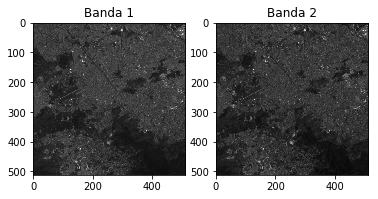

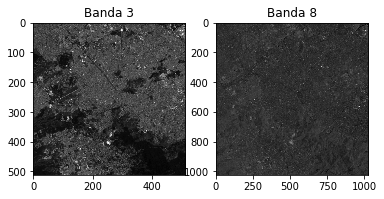

In [4]:
scale = 2
images = [img[crop_pos[0]:crop_pos[0] + crop_size_1d, crop_pos[1]:crop_pos[1] + crop_size_1d] for img in images]
image_reference = image_reference[
                  scale * crop_pos[0]:scale * (crop_pos[0] + crop_size_1d),
                  scale * crop_pos[1]:scale * (crop_pos[1] + crop_size_1d)]

image_side_by_side(images[:2], ["Banda 1", "Banda 2"])
image_side_by_side([images[2], image_reference], ["Banda 3", "Banda 8"])

Criando o composite RGB e depois é necessário alterar o tamanho das imagens pra ficarem ambas na escala de GRE 15m.

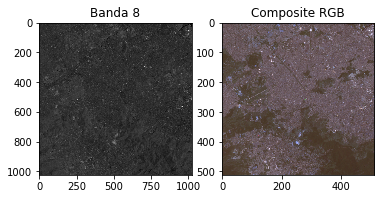

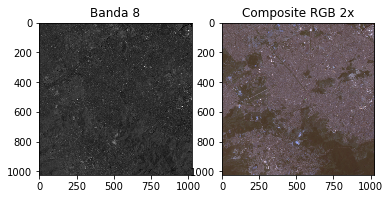

In [5]:
# Creating composite
composite_image = np.zeros([images[0].shape[0], images[0].shape[1], 3], dtype="uint8")
for i in range(3):
    composite_image[..., i] = images[i]

image_side_by_side([image_reference, composite_image], ["Banda 8", "Composite RGB"])

# Resizing
new_size = images[0].shape[1] * scale, images[0].shape[0] * scale
# images = [cv2.resize(img, (int(new_size[0]), int(new_size[1]))) for img in images]
composite_image = cv2.resize(composite_image, (int(new_size[0]), int(new_size[1])))

image_side_by_side([image_reference, composite_image], ["Banda 8", "Composite RGB 2x"])

Agora é feita a conversão do composite de RGB para HSV e então as imagens são colocadas lado a lado, o processo é comparado para a imagem fusionada em HSV e com sua versão em tons de cinza.
Após é calculado o erro quadrático médio entre a imagem banda 8 e a imagem fusionada.

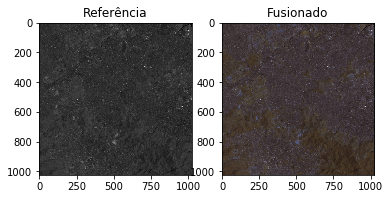

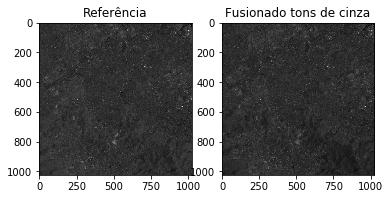

Erro quadrático médio: 87.693


In [6]:
# Converting to HSV
composite_image = cv2.cvtColor(composite_image, cv2.COLOR_BGR2HSV)

# Fusioning
composite_image[..., 2] = image_reference

# HSV to BGR
composite_image = cv2.cvtColor(composite_image, cv2.COLOR_HSV2BGR)
image_side_by_side([image_reference, composite_image], ["Referência", "Fusionado"])

composite_image = cv2.cvtColor(composite_image, cv2.COLOR_BGR2GRAY)
image_side_by_side([image_reference, composite_image], ["Referência", "Fusionado tons de cinza"])

print(f"Erro quadrático médio: {mean_squared_error(image_reference, composite_image):.3f}")

## Discussão

Após ser utilizadas 3 imagens de banda 1, 2 e 3 de GRE de 30m e uma imagem de banda 8 com GRE de 15m foram realizadas operações de fusão de bandas, foi alterado o tamanho das imagens de GRE de 30m para se adequarem à imagem de banda 8, então foi realizada uma conversão de RGB para HSV e então foi realizada a fusão.
Após todas as etapas do processo foi calculado o erro quadrático médio entre a imagem em banda 8 e a imagem fusionada encontrada, obtendo-se o valor de 87,693, levando em consideração todas as operações realizadas para adequação da imagem pode-se dizer que obteve-se um erro quadrático médio pequeno para as imagens.